<a href="https://colab.research.google.com/github/charlesHsuGG/Kaggle-Challenge-Real-Disease-Detection/blob/master/real_diease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Think and analusis EDA for kaggle real dieases detection challenge Using TF 2.0 Feature

Downlaod Bert Model

In [1]:
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_cased_L-24_H-1024_A-16.zip
!unzip wwm_cased_L-24_H-1024_A-16.zip

--2020-04-13 02:23:21--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_cased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1242589256 (1.2G) [application/zip]
Saving to: ‘wwm_cased_L-24_H-1024_A-16.zip’

wwm_cased_L-24_H-10 100%[===================>]   1.16G  61.1MB/s    in 20s     

2020-04-13 02:23:42 (58.1 MB/s) - ‘wwm_cased_L-24_H-1024_A-16.zip’ saved [1242589256/1242589256]

Archive:  wwm_cased_L-24_H-1024_A-16.zip
   creating: wwm_cased_L-24_H-1024_A-16/
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_cased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_cased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_cased_L-24_H-1024_A-16/be

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [4]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.2.0-rc2
/device:GPU:0


**Analysis Data**

In [6]:
!unzip dataset/nlp-getting-started.zip -d dataset/

Archive:  dataset/nlp-getting-started.zip
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/dataset/train.csv")
df['location'].fillna('UNKNOW',inplace=True)
df.fillna('',inplace=True)

In [9]:
df.head()

,id,keyword,location,text,target
0,1,,UNKNOW,Our Deeds are the Reason of this #earthquake M...,1
1,4,,UNKNOW,Forest fire near La Ronge Sask. Canada,1
2,5,,UNKNOW,All residents asked to 'shelter in place' are ...,1
3,6,,UNKNOW,"13,000 people receive #wildfires evacuation or...",1
4,7,,UNKNOW,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
from tqdm import tqdm_notebook as tqdm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


sample Samples

In [0]:
import numpy as np

Text(0, 0.5, 'samples')

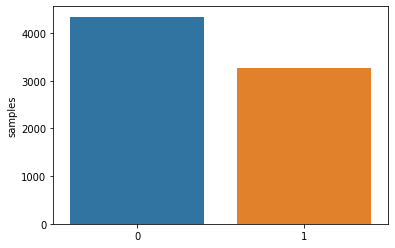

In [12]:
x=df['target'].value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [13]:
x

0    4342
1    3271
Name: target, dtype: int64

In [14]:
analysis_location = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  if row['location'] not in analysis_location:
    analysis_location[row['location']] = [0, 0]
  if row['target'] == 1:
    real, fake = analysis_location[row['location']]
    analysis_location[row['location']] = [real+1, fake]
  else:
    real, fake = analysis_location[row['location']]
    analysis_location[row['location']] = [real, fake+1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


檢測區域對虛假樣例的影響

In [15]:
most_important_data = sorted(analysis_location.items(), key=lambda x:x[1], reverse=True)[:10]

most_important_data

[('UNKNOW', [1075, 1458]),
 ('USA', [67, 37]),
 ('United States', [27, 23]),
 ('Nigeria', [22, 6]),
 ('India', [20, 4]),
 ('Mumbai', [19, 3]),
 ('New York', [16, 55]),
 ('London', [16, 29]),
 ('UK', [16, 11]),
 ('Washington, DC', [15, 6])]

Text(0, 0.5, 'samples')

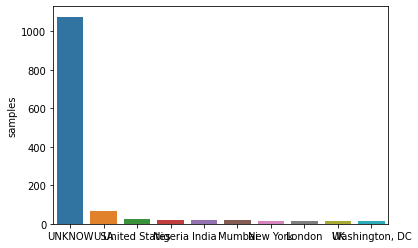

In [16]:
sns.barplot([k for k, v in most_important_data], [v[0] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

In [17]:
most_important_data = sorted(analysis_location.items(), key=lambda x:x[1][1], reverse=True)[:10]

most_important_data

[('UNKNOW', [1075, 1458]),
 ('New York', [16, 55]),
 ('USA', [67, 37]),
 ('London', [16, 29]),
 ('United States', [27, 23]),
 ('Los Angeles, CA', [8, 18]),
 ('Canada', [13, 16]),
 ('Kenya', [5, 15]),
 ('Everywhere', [3, 12]),
 ('UK', [16, 11])]

Text(0, 0.5, 'samples')

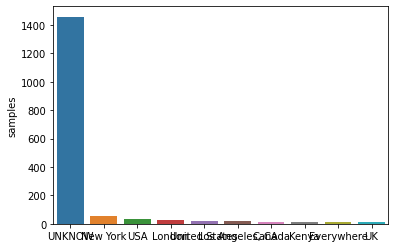

In [18]:
sns.barplot([k for k, v in most_important_data], [v[1] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

analysis keyword

In [19]:
analysis_keyword = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  if row['keyword'] not in analysis_keyword:
    analysis_keyword[row['keyword']] = [0, 0]
  if row['target'] == 1:
    real, fake = analysis_keyword[row['keyword']]
    analysis_keyword[row['keyword']] = [real+1, fake]
  else:
    real, fake = analysis_keyword[row['keyword']]
    analysis_keyword[row['keyword']] = [real, fake+1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [20]:
most_important_data = sorted(analysis_keyword.items(), key=lambda x:x[1], reverse=True)[:10]

most_important_data

[('', [42, 19]),
 ('outbreak', [39, 1]),
 ('derailment', [39, 0]),
 ('wreckage', [39, 0]),
 ('oil%20spill', [37, 1]),
 ('typhoon', [37, 1]),
 ('debris', [37, 0]),
 ('evacuated', [32, 4]),
 ('rescuers', [32, 3]),
 ('suicide%20bomb', [32, 3])]

Text(0, 0.5, 'samples')

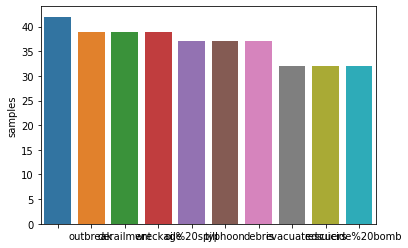

In [21]:
sns.barplot([k for k, v in most_important_data], [v[0] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

In [22]:
most_important_data = sorted(analysis_keyword.items(), key=lambda x:x[1][1], reverse=True)[:10]

most_important_data

[('body%20bags', [1, 40]),
 ('armageddon', [5, 37]),
 ('harm', [4, 37]),
 ('deluge', [6, 36]),
 ('ruin', [1, 36]),
 ('wrecked', [3, 36]),
 ('explode', [3, 35]),
 ('fear', [5, 35]),
 ('siren', [5, 35]),
 ('twister', [5, 35])]

Text(0, 0.5, 'samples')

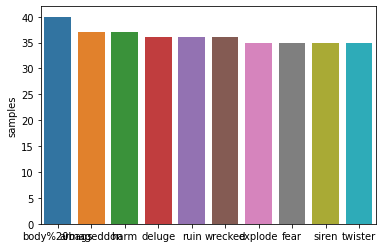

In [23]:
sns.barplot([k for k, v in most_important_data], [v[1] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

分析tweet 內容

In [0]:
from collections import Counter

In [25]:
analysis_with_url = Counter()
analysis_without_url = Counter()
for i, row in tqdm(df.iterrows(), total=len(df)):
  if row['text'].find("http://") >= 0 or row['text'].find("https://") >= 0 :
    analysis_with_url[row['target']] += 1
  else:
    analysis_without_url[row['target']] += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'samples')

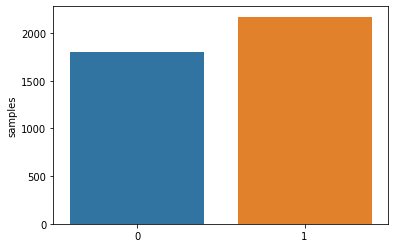

In [26]:
sns.barplot([k for k, v in analysis_with_url.items()], [v for k, v in analysis_with_url.items()])
plt.gca().set_ylabel('samples')

Text(0, 0.5, 'samples')

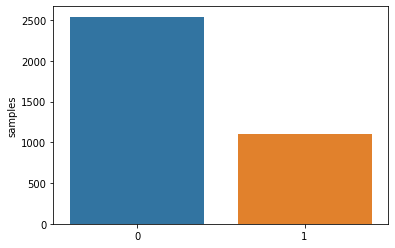

In [27]:
sns.barplot([k for k, v in analysis_without_url.items()], [v for k, v in analysis_without_url.items()])
plt.gca().set_ylabel('samples')

clean text url

In [28]:
!pip install emoji
!pip install pyspellchecker

     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=fa61b300cd3312c2b3356ef2005e1b03c9ba7ecefd1f6ed451c8a57e67bed825
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 1.9MB 32.2MB/s 


In [0]:
import re
import emoji
import requests
from spellchecker import SpellChecker

In [0]:
spell = SpellChecker()
def correct_wrong_word(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [0]:
def give_emoji_free_text(text):
    """
    清除特殊表情字符
    """
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ''.join([str for str in text if not any(i in str for i in emoji_list)])

    return clean_text

In [0]:
def clean_data(df_item):
    _, row = df_item
    text = row['text']
    if row['text'].find("http://") >= 0 or row['text'].find("https://") >= 0 :
      row['has_Source'] = [1.0]
    else:
      row['has_Source'] = [0.0]
    redirect_url = ""
    if re.findall("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)", text):
      http_url = re.findall("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)", text)[0]
      if http_url[0]:
        try:
          r = requests.get(http_url[0], timeout=1)
          redirect_url = r.url
        except:
          redirect_url = ""
      else:
        try:
          r = requests.get(http_url[1], timeout=1)
          redirect_url = r.url
        except:
          redirect_url = ""
    row['source_url'] = redirect_url
    results=re.compile("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)", re.S)
    clean_text = results.sub("",text)
    ### clean hashtag #####
    clean_text = clean_text.replace("#", "").replace("@", "")
    #### clean html code ####
    html = re.compile("<.*?>",re.S)
    clean_text = html.sub(r'', clean_text)
    clean_text = give_emoji_free_text(clean_text)
    #### correct wrong word ####
    clean_text = correct_wrong_word(clean_text)
    row['clean_text'] = clean_text

    return row

In [0]:
from utils.muti_cpu_tool import imap_unordered_bar_with_gen

In [0]:
map_response = imap_unordered_bar_with_gen(clean_data, df.iterrows(), len(df))

In [0]:
df = pd.DataFrame(map_response)

In [0]:
df[df['source_url'] != ""].head()

,Unnamed: 0,id,keyword,location,text,target,has_Source,source_url,clean_text
30,31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,[1.0],https://twitter.com/dannypurewal/status/629284...,bbc-tv Wholesale Markets ablaze
31,32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,[1.0],https://twitter.com/Valis_Ablaze/status/629274...,We always try to bring the heavy metal RT
32,33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,[1.0],https://africanbaze.com/breaking-newsnigeria-f...,AFRICANBAZE: Breaking news:Nigeria flag set ab...
35,35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,[1.0],https://twitter.com/AnyOtherAnnaK/status/62919...,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
37,37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,[1.0],https://www.yabaleftonline.ng,INEC Office in Abia Set Ablaze -


In [0]:
analysis_url = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  url_type = None
  if re.findall("http[s]:\/\/(?P<url_type>.*?)\/", row['source_url']):
    url_type = re.findall("http[s]:\/\/(?P<url_type>.*?)\/", row['source_url'])[0]
  if url_type:
    if url_type not in analysis_url:
      analysis_url[url_type] = [0, 0]
    if row['target'] == 1:
      real, fake = analysis_url[url_type]
      analysis_url[url_type] = [real+1, fake]
    else:
      real, fake = analysis_url[url_type]
      analysis_url[url_type] = [real, fake+1]

In [0]:
len(analysis_url)

683

In [0]:
most_important_data = sorted(analysis_url.items(), key=lambda x:x[1], reverse=True)[:10]

most_important_data

[('twitter.com', [236, 290]),
 ('www.youtube.com', [54, 109]),
 ('www.bbc.co.uk', [50, 3]),
 ('abcnews.go.com', [49, 5]),
 ('www.facebook.com', [37, 47]),
 ('www.instagram.com', [19, 48]),
 ('news.yahoo.com', [17, 4]),
 ('earthquake.usgs.gov', [17, 2]),
 ('www.cnn.com', [17, 1]),
 ('www.theguardian.com', [16, 6])]

Text(0, 0.5, 'samples')

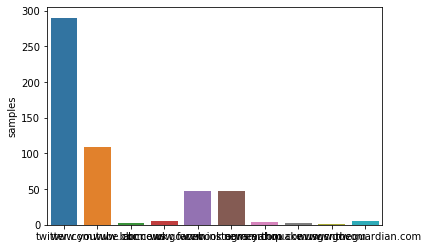

In [0]:
sns.barplot([k for k, v in most_important_data], [v[1] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

In [0]:
most_important_data = sorted(analysis_url.items(), key=lambda x:x[1][1], reverse=True)[:10]

most_important_data

[('twitter.com', [236, 290]),
 ('www.youtube.com', [54, 109]),
 ('www.ebay.com', [8, 79]),
 ('www.instagram.com', [19, 48]),
 ('www.facebook.com', [37, 47]),
 ('youthsnews.com.au', [15, 26]),
 ('www.amazon.com', [7, 23]),
 ('www.billboard.com', [1, 20]),
 ('www.wired.com', [3, 18]),
 ('soundcloud.com', [2, 14])]

Text(0, 0.5, 'samples')

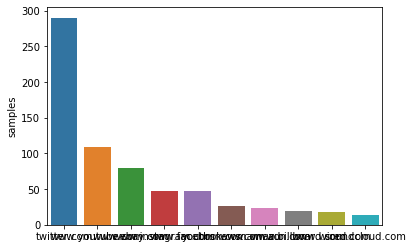

In [0]:
sns.barplot([k for k, v in most_important_data], [v[1] for k, v in most_important_data])
plt.gca().set_ylabel('samples')

In [0]:
url_type2id = {"UNKNOW": 0}
for i, row in tqdm(df.iterrows(), total=len(df)):
  url_type = "UNKNOW"
  if re.findall("(http[s]:\/\/(.*?)\/)", row['source_url']):
    url_type = re.findall("(http[s]:\/\/(.*?)\/)", row['source_url'])[0][1]
  if url_type not in url_type2id:
    url_type2id[url_type] = len(url_type2id)

In [0]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  url_type = None
  if re.findall("(http[s]:\/\/(.*?)\/)", row['source_url']):
    url_type = re.findall("(http[s]:\/\/(.*?)\/)", row['source_url'])[0][1]
  sequence = [0.0] * (len(url_type2id) - 1)
  if not url_type:
    df.loc[i, "url_type"] = str(sequence)
  else:
    sequence[url_type2id[url_type] - 1] = 1.0
    df.loc[i, "url_type"] = str(sequence)

In [0]:
df.head()

,Unnamed: 0,id,keyword,location,text,target,has_Source,source_url,clean_text,url_type
0,1,4,,UNKNOW,Forest fire near La Ronge Sask. Canada,1,[0.0],,Forest fire near La Ronge Sask. Canada,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,1,,UNKNOW,Our Deeds are the Reason of this #earthquake M...,1,[0.0],,Our Deeds are the Reason of this earthquake Ma...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,5,,UNKNOW,All residents asked to 'shelter in place' are ...,1,[0.0],,All residents asked to shelter in place are be...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,7,,UNKNOW,Just got sent this photo from Ruby #Alaska as ...,1,[0.0],,Just got sent this photo from Ruby Alaska as s...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,8,,UNKNOW,#RockyFire Update => California Hwy. 20 closed...,1,[0.0],,RockyFire Update of California Hwy. 20 closed ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
keywords = df['keyword'].unique()

keyword2id = {"UNKNOW":0}
for keyword in keywords:
  if keyword:
    keyword2id[keyword] = len(keyword2id)

In [0]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  kw = row['keyword']
  sequence = [0.0] * (len(keyword2id) - 1)
  if not kw:
    df.loc[i, 'keyword'] = str(sequence)
  else:
    sequence[keyword2id[kw] - 1] = 1.0
    df.loc[i, 'keyword'] = str(sequence)

In [0]:
df.head()

,Unnamed: 0,id,keyword,location,text,target,has_Source,source_url,clean_text,url_type
0,1,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Forest fire near La Ronge Sask. Canada,1,[0.0],,Forest fire near La Ronge Sask. Canada,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Our Deeds are the Reason of this #earthquake M...,1,[0.0],,Our Deeds are the Reason of this earthquake Ma...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,All residents asked to 'shelter in place' are ...,1,[0.0],,All residents asked to shelter in place are be...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Just got sent this photo from Ruby #Alaska as ...,1,[0.0],,Just got sent this photo from Ruby Alaska as s...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,#RockyFire Update => California Hwy. 20 closed...,1,[0.0],,RockyFire Update of California Hwy. 20 closed ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


blance data

In [0]:
real_df = pd.DataFrame()
fake_df = pd.DataFrame()
index_real = 0
index_fake = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
  target = row['target']
  if target == 1:
    real_df.loc[index_real, 'keyword'] = row['keyword']
    real_df.loc[index_real, 'text'] = row['clean_text']
    real_df.loc[index_real, 'has_Source'] = row['has_Source']
    real_df.loc[index_real, 'url_type'] = row['url_type']
    real_df.loc[index_real, 'target'] = row['target']
    index_real += 1
  else:
    fake_df.loc[index_fake, 'keyword'] = row['keyword']
    fake_df.loc[index_fake, 'text'] = row['clean_text']
    fake_df.loc[index_fake, 'has_Source'] = row['has_Source']
    fake_df.loc[index_fake, 'url_type'] = row['url_type']
    fake_df.loc[index_fake, 'target'] = row['target']
    index_fake += 1

In [0]:
real_df.head()

,keyword,text,has_Source,url_type,target
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Forest fire near La Ronge Sask. Canada,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Our Deeds are the Reason of this earthquake Ma...,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",All residents asked to shelter in place are be...,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Just got sent this photo from Ruby Alaska as s...,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",RockyFire Update of California Hwy. 20 closed ...,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0


In [0]:
fake_df.head()

,keyword,text,has_Source,url_type,target
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",What's up many,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",I love fruits,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Summer is lovely,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",My car is so fast,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",this is ridiculous....,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0


In [0]:
fake_df = fake_df.sample(len(real_df))

In [0]:
df = pd.concat([real_df, fake_df], ignore_index=True)

Text(0, 0.5, 'samples')

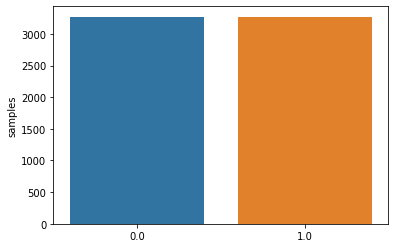

In [0]:
x=df['target'].value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [0]:
import re
from collections import Counter
import tensorflow_hub as hub
import tensorflow as tf
from utils.tokenization import FullTokenizer     # Still from bert module
from utils.modeling import BertConfig, BertModel
from tensorflow.keras.models import Model       # Keras is the new high level API for TensorFlow
import math

In [0]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [0]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [0]:
# Google Colab don't need this. FullTokenizer is not updated to tf2.0 yet
tf.gfile = tf.io.gfile

In [0]:
MODEL_DIR = "wwm_cased_L-24_H-1024_A-16" #@param {type:"string"} ['wwm_cased_L-24_H-1024_A-16']

config_path = "/content/{}/bert_config.json".format(MODEL_DIR)
vocab_path = "/content/{}/vocab.txt".format(MODEL_DIR)

bert_config = BertConfig.from_json_file(config_path)

In [0]:
tokenizer = FullTokenizer(vocab_path, do_lower_case=True)

In [0]:
def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [0]:
max_seq_length=256

In [0]:
class JointClassification(tf.keras.Model):
    def __init__(self, doropout_rate = 0.1, max_seq_length=max_seq_length, bert_config = bert_config, hidden_size=768):
        super(JointClassification, self).__init__()
        self.input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                          name="input_word_ids")
        self.input_word_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                          name="input_word_mask")
        self.segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                            name="segment_ids")
        self.has_source = tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                                            name="has_source")
        self.content_cata = tf.keras.layers.Input(shape=(len(keyword2id) - 1,), dtype=tf.float32,
                                            name="content_cata")
        self.url_type = tf.keras.layers.Input(shape=(len(url_type2id) - 1,), dtype=tf.float32,
                                            name="url_type")
        
        self.bert_layer = BertModel(config=bert_config, name='bert')

        self.cls_fc_droput = tf.keras.layers.Dropout(doropout_rate)
        self.cls_fc_layer = tf.keras.layers.Dense(hidden_size, activation="tanh")

        self.concat_h = tf.keras.layers.Concatenate(axis=-1)

        self.logit_output = tf.keras.layers.Dropout(doropout_rate)
        self.logit = tf.keras.layers.Dense(1, activation="sigmoid")

    def call(self, inputs, build = False):
        input_word_ids, input_mask, segment_ids, content_cata, has_source, url_type = inputs

        if not build:
          input_word_ids = self.input_word_ids(input_word_ids)
          input_mask = self.input_word_mask(attention_mask)
          segment_ids = self.segment_ids(token_type_ids)
          content_cata = self.content_cata(content_cata)
          has_source = self.has_source(has_source)
          url_type = self.url_type(url_type)

        pooled_output, sequence_output = self.bert_layer(input_word_ids=input_word_ids,
                                                          input_mask=input_mask,
                                                          input_type_ids=segment_ids)
        
        concat_h = self.concat_h([content_cata, url_type, has_source, pooled_output])
        
        cls_dropout = self.cls_fc_droput(concat_h)
        pooled_output = self.cls_fc_layer(cls_dropout)

        drop_output = self.logit_output(pooled_output)
        logits = self.logit(drop_output)

        return logits

    def buile_model(self, max_seq_length=max_seq_length):
        input_ids_shape=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32)
        attention_mask_shape=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32)
        token_type_ids_shape=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32)
        content_cata=tf.keras.layers.Input(shape=(len(keyword2id) - 1,), dtype=tf.float32)
        has_source=tf.keras.layers.Input(shape=(1,), dtype=tf.float32)
        url_type = tf.keras.layers.Input(shape=(len(url_type2id) - 1,), dtype=tf.float32)
        inputs = input_ids_shape, attention_mask_shape, token_type_ids_shape, content_cata, has_source, url_type
        return Model(inputs=[inputs], outputs=self.call(inputs, build = True))

In [0]:
model = JointClassification().buile_model()

In [0]:
model_params = {v.name:v for v in model.trainable_variables}
model_roots = np.unique([v.name.split('/')[0] for v in model.trainable_variables])
# print(model_roots)
saved_names = [k for k,v in tf.train.list_variables('/content/wwm_cased_L-24_H-1024_A-16/bert_model.ckpt')]
a_map = {v:v+':0' for v in saved_names}
# print(a_map)
model_roots = np.unique([v.name.split('/')[0] for v in model.trainable_variables])
# print(model_roots)
def transform(x):
    x = x.replace('attention/self','attention')
    x = x.replace('attention','self_attention')
    x = x.replace('attention/output','attention_output')  

    x = x.replace('/dense','')
    x = x.replace('/LayerNorm','_layer_norm')
    x = x.replace('embeddings_layer_norm','embeddings/layer_norm')  

    x = x.replace('attention_output_layer_norm','attention_layer_norm')  
    x = x.replace('embeddings/word_embeddings','word_embeddings/embeddings')

    x = x.replace('/embeddings/','/embedding_postprocessor/')  
    x = x.replace('/token_type_embeddings','/type_embeddings')  
    x = x.replace('/pooler/','/pooler_transform/')  
    x = x.replace('answer_type_output_bias','ans_type/bias')  
    x = x.replace('answer_type_output_','ans_type/')
    x = x.replace('cls/nq/output_','logits/')
    x = x.replace('/weights','/kernel')

    return x
a_map = {k:model_params.get(transform(v),None) for k,v in a_map.items() if k.startswith('bert')}
# print(a_map)
tf.compat.v1.train.init_from_checkpoint(ckpt_dir_or_file='/content/wwm_cased_L-24_H-1024_A-16/bert_model.ckpt',
                                        assignment_map=a_map)

In [0]:
model.layers[6].trainable = False

In [0]:
optimizer = tf.keras.optimizers.Adam(lr=2e-5)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 221)]        0                                            
______________________________________________________________________________________________

In [0]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

In [0]:
import ast

In [0]:
def train_data_generator():

  for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    tokens_a = tokenizer.tokenize(row['text'])

    has_source = ast.literal_eval(row['has_Source'])
    keyword_cata = ast.literal_eval(row['keyword'])
    url_type = ast.literal_eval(row['url_type'])

    target = int(row['target'])

    special_tokens_count = 2 #### for bert
    if len(tokens_a) > max_seq_length - special_tokens_count:
        tokens_a = tokens_a[:(max_seq_length - special_tokens_count)]
    
    stokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    input_word_ids = get_ids(stokens, tokenizer, max_seq_length=max_seq_length)
    input_mask = get_masks(stokens, max_seq_length=max_seq_length)
    segment_ids = get_segments(stokens, max_seq_length=max_seq_length)

    assert len(input_word_ids) == max_seq_length, "Error with input length {} vs {}".format(len(input_word_ids), max_seq_length)
    assert len(input_mask) == max_seq_length, "Error with attention mask length {} vs {}".format(len(input_mask), max_seq_length)
    assert len(segment_ids) == max_seq_length, "Error with token type length {} vs {}".format(len(segment_ids), max_seq_length)

    yield (input_word_ids, input_mask, segment_ids, keyword_cata, has_source, url_type), target

In [0]:
train_ds = tf.data.Dataset.from_generator(train_data_generator, ((tf.int32, tf.int32, tf.int32, tf.float32, tf.float32, tf.float32), (tf.int32)))

In [0]:
def val_data_generator():

  for i, row in tqdm(val_df.iterrows(), total=len(val_df)):
    tokens_a = tokenizer.tokenize(row['text'])

    has_source = ast.literal_eval(row['has_Source'])
    keyword_cata = ast.literal_eval(row['keyword'])
    url_type = ast.literal_eval(row['url_type'])

    target = int(row['target'])

    special_tokens_count = 2 #### for bert
    if len(tokens_a) > max_seq_length - special_tokens_count:
        tokens_a = tokens_a[:(max_seq_length - special_tokens_count)]
    
    stokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    input_word_ids = get_ids(stokens, tokenizer, max_seq_length=max_seq_length)
    input_mask = get_masks(stokens, max_seq_length=max_seq_length)
    segment_ids = get_segments(stokens, max_seq_length=max_seq_length)

    assert len(input_word_ids) == max_seq_length, "Error with input length {} vs {}".format(len(input_word_ids), max_seq_length)
    assert len(input_mask) == max_seq_length, "Error with attention mask length {} vs {}".format(len(input_mask), max_seq_length)
    assert len(segment_ids) == max_seq_length, "Error with token type length {} vs {}".format(len(segment_ids), max_seq_length)

    yield (input_word_ids, input_mask, segment_ids, keyword_cata, has_source, url_type), target

In [0]:
val_ds = tf.data.Dataset.from_generator(val_data_generator, ((tf.int32, tf.int32, tf.int32, tf.float32, tf.float32, tf.float32), (tf.int32)))

In [0]:
TRAIN_DATA_SIZE = len([ds for ds in train_ds])
TEST_DATA_SIZE = len([ds for ds in val_ds])

In [0]:
print(TRAIN_DATA_SIZE)
print(TEST_DATA_SIZE)

5887
655


In [0]:
batch_size = 64

In [0]:
train_dataset = train_ds.shuffle(10, reshuffle_each_iteration = False )
train_dataset = train_dataset.take(TRAIN_DATA_SIZE)
val_dataset = val_ds.shuffle(10, reshuffle_each_iteration = False )
val_dataset = val_dataset.take(TEST_DATA_SIZE)

In [0]:
train_dataset1 = train_dataset.repeat().batch(batch_size, drop_remainder=True)

In [0]:
def generator():
    while True:
        print("initialize DataSet")
        for inputs, output in train_dataset1:
            yield inputs, output

In [0]:
val_dataset1 = val_dataset.repeat().batch(batch_size, drop_remainder=True)

In [0]:
def vaild_generator():
    while True:
      print("initialize DataSet")
      for inputs, output in val_dataset1:
          yield inputs, output

In [0]:
el_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_zero7.{epoch:02d}-{loss:.6f}.hdf5',
                                                   verbose=1,
                                                   save_best_only=True, save_weights_only = True)

In [0]:
nums_epoch = 20
h = model.fit_generator(generator(), callbacks=[el_stop, reduce_lr, checkpointer], 
                        epochs=nums_epoch, steps_per_epoch=TRAIN_DATA_SIZE // batch_size, 
                        validation_data = vaild_generator(), validation_steps = TEST_DATA_SIZE // batch_size,
                        use_multiprocessing = False)

In [0]:
loss, acc = model.evaluate_generator(vaild_generator(), steps = TEST_DATA_SIZE // batch_size, use_multiprocessing = False)

initialize DataSet


  ...
    to  
  ['...']


In [0]:
print('loss: ', loss, 'accuracy: ', acc)

loss:  0.5300900280475617 accuracy:  0.746875


In [0]:
df_test = pd.read_csv("/content/dataset/test.csv")
df_test['location'].fillna('UNKNOW',inplace=True)
df_test.fillna('',inplace=True)

In [0]:
df_test.head()

,id,keyword,location,text
0,0,,UNKNOW,Just happened a terrible car crash
1,2,,UNKNOW,"Heard about #earthquake is different cities, s..."
2,3,,UNKNOW,"there is a forest fire at spot pond, geese are..."
3,9,,UNKNOW,Apocalypse lighting. #Spokane #wildfires
4,11,,UNKNOW,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
def clean_test_data(df_item):
    i, row = df_item
    text = row['text']
    if row['text'].find("http://") >= 0 or row['text'].find("https://") >= 0 :
      row['has_Source'] = [1.0]
    else:
      row['has_Source'] = [0.0]
    redirect_url = ""
    if re.findall("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)", text):
      http_url = re.findall("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)", text)[0]
      if http_url[0]:
        try:
          r = requests.get(http_url[0], timeout=1)
          redirect_url = r.url
        except:
          redirect_url = ""
      else:
        try:
          r = requests.get(http_url[1], timeout=1)
          redirect_url = r.url
        except:
          redirect_url = ""
    url_type = None
    if re.findall("(http[s]:\/\/(.*?)\/)", redirect_url):
      url_type = re.findall("(http[s]:\/\/(.*?)\/)", redirect_url)[0][1]
    sequence = [0.0] * (len(url_type2id) - 1)
    if not url_type:
      row["url_type"] = str(sequence)
    else:
      if url_type in url_type2id:
        sequence[url_type2id[url_type] - 1] = 1.0
      row["url_type"] = str(sequence)
    kw = row['keyword']
    sequence = [0.0] * (len(keyword2id) - 1)
    if not kw:
      row['keyword'] = str(sequence)
    else:
      if kw in keyword2id:
        sequence[keyword2id[kw] - 1] = 1.0
      row['keyword'] = str(sequence)
    results=re.compile("(https://[a-zA-Z0-9.?/&=:]*)|(http://[a-zA-Z0-9.?/&=:]*)",re.S)
    clean_text = results.sub("",text)
    ### clean hashtag #####
    clean_text = clean_text.replace("#", "").replace("@", "")
    #### clean html code ####
    html=re.compile("<.*?>",re.S)
    clean_text = html.sub(r'', clean_text)
    clean_text = give_emoji_free_text(clean_text)
    #### correct wrong word ####
    clean_text = correct_wrong_word(clean_text)
    row['text'] = clean_text

    return row

In [0]:
map_response = imap_unordered_bar_with_gen(clean_test_data, df_test.iterrows(), len(df_test))

In [0]:
df_test = pd.DataFrame(map_response)

In [0]:
df_test.head()

,id,keyword,location,text,has_Source,url_type
1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Heard about earthquake is different cities sta...,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Just happened a terrible car crash,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Apocalypse lighting Spokane wildfire,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,Typhoon Soudelor kills 28 in China and Taiwan,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",UNKNOW,We're shaking...It's an earthquake,[0.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
def test_data_generator():
  for i, row in tqdm(df_test.iterrows(), total=len(df_test)):
      id = str(row['id'])
      tokens_a = tokenizer.tokenize(row['text'])

      has_source = row['has_Source']
      keyword_cata = ast.literal_eval(row['keyword'])
      url_type = ast.literal_eval(row['url_type'])

      special_tokens_count = 2 #### for bert
      if len(tokens_a) > max_seq_length - special_tokens_count:
          tokens_a = tokens_a[:(max_seq_length - special_tokens_count)]
      
      stokens = ["[CLS]"] + tokens_a + ["[SEP]"]
      input_word_ids = get_ids(stokens, tokenizer, max_seq_length=max_seq_length)
      input_mask = get_masks(stokens, max_seq_length=max_seq_length)
      segment_ids = get_segments(stokens, max_seq_length=max_seq_length)

      assert len(input_word_ids) == max_seq_length, "Error with input length {} vs {}".format(len(input_word_ids), max_seq_length)
      assert len(input_mask) == max_seq_length, "Error with attention mask length {} vs {}".format(len(input_mask), max_seq_length)
      assert len(segment_ids) == max_seq_length, "Error with token type length {} vs {}".format(len(segment_ids), max_seq_length)

      yield (id, (input_word_ids, input_mask, segment_ids, keyword_cata, has_source, url_type))

In [0]:
test_ds = tf.data.Dataset.from_generator(test_data_generator, (tf.string, (tf.int32, tf.int32, tf.int32, tf.float32, tf.float32, tf.float32)))

In [0]:
test_ds1 = test_ds.batch(1)

In [0]:
output_df = pd.DataFrame()
index = 0
for ds in test_ds1:
  id, input = ds
  predict = model.predict(input)[0]
  predict[predict <= 0.5] = 0.
  predict[predict > 0.5] = 1.
  output_df.loc[index, 'id'] = id.numpy()[0].decode()
  output_df.loc[index, 'target'] = predict[0]
  index += 1

In [0]:
output_df.head()

,id,target
0,2,1.0
1,0,0.0
2,9,1.0
3,11,1.0
4,12,1.0


In [0]:
result_df = pd.read_csv("dataset/sample_submission.csv")

In [0]:
for i, row in tqdm(result_df.iterrows(), total=len(result_df)):
  id = str(int(row['id']))
  target = 0.0
  # print(id)
  # print(output_df.loc[output_df['id'] == id]['target'])
  # if output_df.loc[output_df['id'] == id]['target'].values:
  target = (output_df.loc[output_df['id'] == id]['target'].values[0])
  result_df.loc[i, 'target'] = target

In [0]:
result_df.head()

,id,target
0,0,0.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0


In [0]:
result_df.to_csv("dataset/sample_submission.csv")